<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   5000 non-null   object 
 1   Age                      5000 non-null   int64  
 2   Education_Level          5000 non-null   object 
 3   Years_of_Experience      5000 non-null   int64  
 4   Current_Salary           5000 non-null   int64  
 5   Expected_Salary          5000 non-null   int64  
 6   Applied_Role             5000 non-null   object 
 7   Notice_Period            5000 non-null   int64  
 8   Current_Location         5000 non-null   object 
 9   Relocation_Preference    5000 non-null   object 
 10  Interview_Score          5000 non-null   float64
 11  Offer_Extended           5000 non-null   object 
 12  Salary_Gap               5000 non-null   int64  
 13  Experience_Salary_Ratio  5000 non-null   float64
 14  Offer_Accepted          

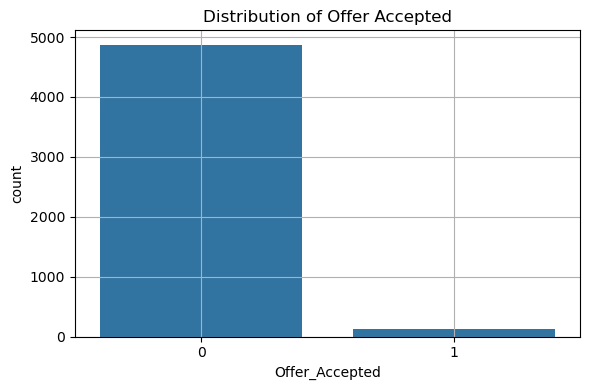

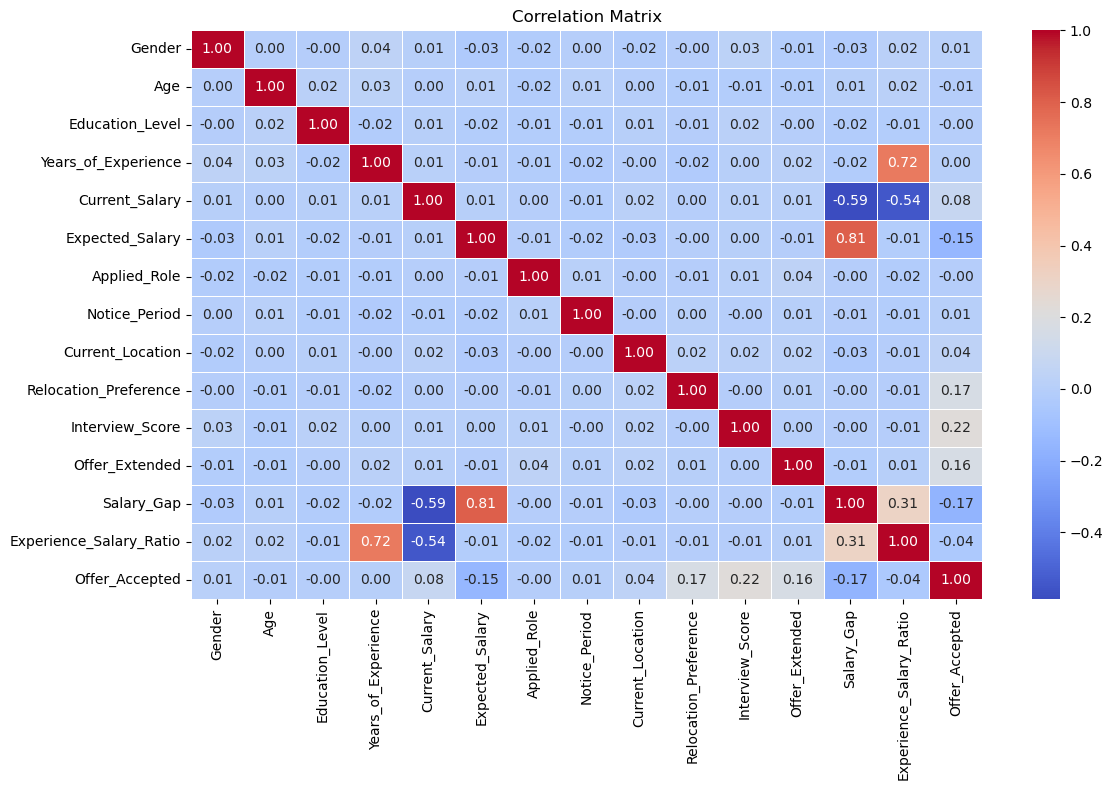

C:\Users\varun\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:00:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


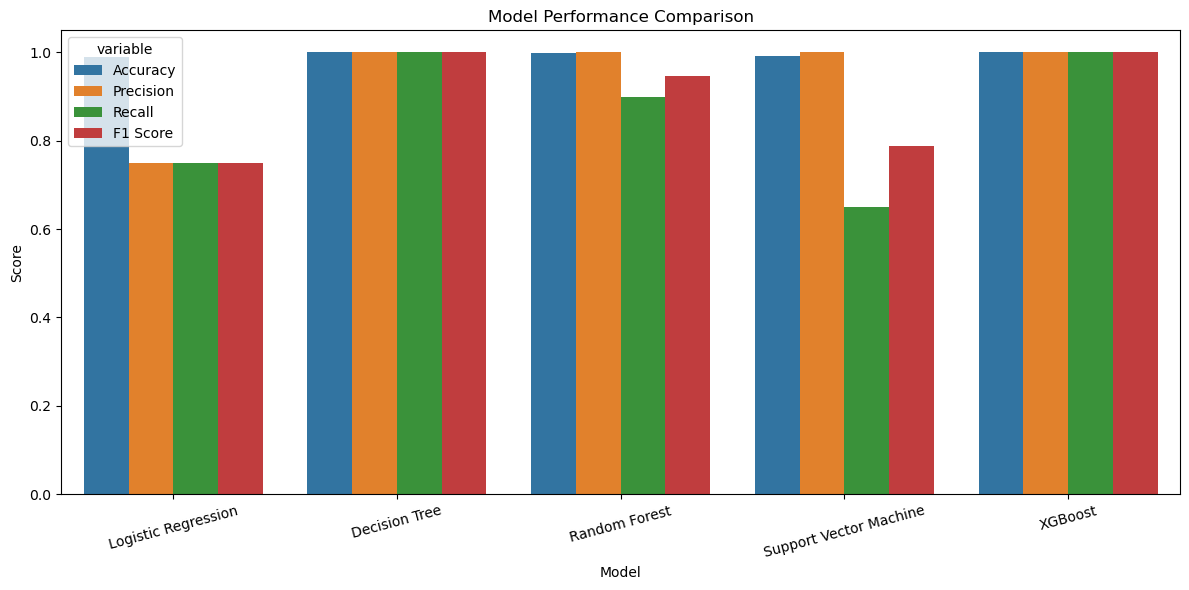

                    Model  Accuracy  Precision  Recall  F1 Score
0     Logistic Regression     0.990       0.75    0.75  0.750000
1           Decision Tree     1.000       1.00    1.00  1.000000
2           Random Forest     0.998       1.00    0.90  0.947368
3  Support Vector Machine     0.993       1.00    0.65  0.787879
4                 XGBoost     1.000       1.00    1.00  1.000000


In [3]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load Dataset
df = pd.read_csv('Desktop/ml external/smart_recruitment_dataset_5000.csv')  # Adjust path as needed

# Step 3: Basic Info
print(df.info())
print(df.head())
print("Null values:\n", df.isnull().sum())

# Step 4: Label Encoding for Categorical Variables
df_clean = df.copy()
label_encoders = {}
for col in df_clean.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Step 5: EDA
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Offer_Accepted', data=df_clean)
plt.title('Distribution of Offer Accepted')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Step 6: Feature Scaling
X = df_clean.drop('Offer_Accepted', axis=1)
y = df_clean['Offer_Accepted']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Train ML Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)

# Step 9: Visualization of Model Performance
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Step 10: Display Final Table
print(results_df)


In [7]:
import pandas as pd
import numpy as np
import gradio as gr
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("Desktop/ml external/smart_recruitment_dataset_5000.csv")
df_clean = df.copy()

# Label Encoding
label_encoders = {}
for col in df_clean.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Prepare features and target
X = df_clean.drop('Offer_Accepted', axis=1)
y = df_clean['Offer_Accepted']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_scaled, y)

# Gradio Prediction Function
def predict_offer(gender, age, education, experience, current_salary, expected_salary,
                  applied_role, notice_period, location, relocation, interview_score,
                  offer_extended):
    input_dict = {
        'Gender': label_encoders['Gender'].transform([gender])[0],
        'Age': int(age),
        'Education_Level': label_encoders['Education_Level'].transform([education])[0],
        'Years_of_Experience': int(experience),
        'Current_Salary': int(current_salary),
        'Expected_Salary': int(expected_salary),
        'Applied_Role': label_encoders['Applied_Role'].transform([applied_role])[0],
        'Notice_Period': int(notice_period),
        'Current_Location': label_encoders['Current_Location'].transform([location])[0],
        'Relocation_Preference': label_encoders['Relocation_Preference'].transform([relocation])[0],
        'Interview_Score': float(interview_score),
        'Offer_Extended': label_encoders['Offer_Extended'].transform([offer_extended])[0]
    }
    input_dict['Salary_Gap'] = input_dict['Expected_Salary'] - input_dict['Current_Salary']
    input_dict['Experience_Salary_Ratio'] = input_dict['Years_of_Experience'] / (input_dict['Expected_Salary'] + 1)
    input_df = pd.DataFrame([input_dict])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)[0]
    return "✅ Offer Accepted" if prediction == 1 else "❌ Offer Declined"

# Launch Gradio
gr.Interface(
    fn=predict_offer,
    inputs=[
        gr.Dropdown(['Male', 'Female'], label="Gender"),
        gr.Number(label="Age"),
        gr.Dropdown(df['Education_Level'].unique().tolist(), label="Education Level"),
        gr.Number(label="Years of Experience"),
        gr.Number(label="Current Salary"),
        gr.Number(label="Expected Salary"),
        gr.Dropdown(df['Applied_Role'].unique().tolist(), label="Applied Role"),
        gr.Number(label="Notice Period (in days)"),
        gr.Dropdown(df['Current_Location'].unique().tolist(), label="Current Location"),
        gr.Dropdown(df['Relocation_Preference'].unique().tolist(), label="Relocation Preference"),
        gr.Slider(0.0, 10.0, step=0.1, label="Interview Score"),
        gr.Dropdown(['Yes', 'No'], label="Offer Extended?")
    ],
    outputs=gr.Text(label="Prediction"),
    title="Smart Recruitment Predictor",
    description="Fill in the candidate details to predict offer acceptance."
).launch()


C:\Users\varun\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:01:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


* Running on local URL:  http://127.0.0.1:7880

To create a public link, set `share=True` in `launch()`.


Accuracy: 0.93
Precision: 0.9102564102564102
Recall: 0.8352941176470589
F1 Score: 0.8711656441717791


C:\Users\varun\AppData\Local\Temp\ipykernel_2360\1724201576.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


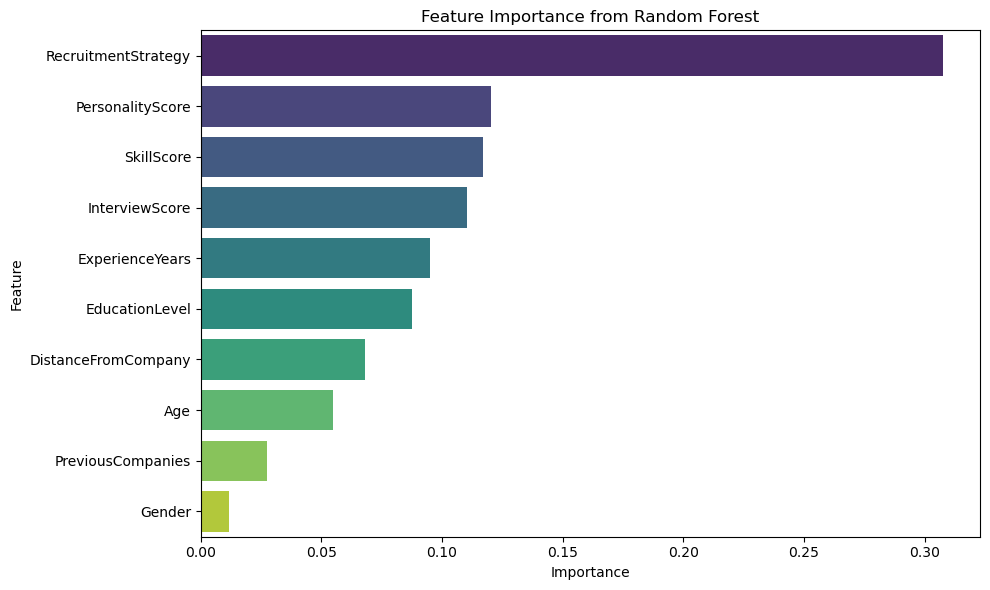

* Running on local URL:  http://127.0.0.1:7881

To create a public link, set `share=True` in `launch()`.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("recruitment_data.csv")

# Features and Target
X = df.drop(columns=['HiringDecision'])
y = df['HiringDecision']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

# Gradio Prediction Function
def predict_hiring(age, gender, education, experience, prev_companies, distance, interview, skill, personality, strategy):
    input_data = pd.DataFrame([[
        int(age), int(gender), int(education), int(experience),
        int(prev_companies), float(distance), int(interview),
        int(skill), int(personality), int(strategy)
    ]], columns=feature_names)
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    return "✅ Hired" if prediction == 1 else "❌ Not Hired"

# Gradio Interface
gr.Interface(
    fn=predict_hiring,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Gender (0=Female, 1=Male)"),
        gr.Number(label="Education Level"),
        gr.Number(label="Years of Experience"),
        gr.Number(label="Previous Companies"),
        gr.Number(label="Distance from Company"),
        gr.Number(label="Interview Score"),
        gr.Number(label="Skill Score"),
        gr.Number(label="Personality Score"),
        gr.Number(label="Recruitment Strategy")
    ],
    outputs=gr.Text(label="Hiring Decision"),
    title="Smart Recruitment Predictor",
    description="Predict if a candidate will be hired based on their profile."
).launch()


C:\Users\varun\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:12:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Performance Comparison:
                  Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.853333   0.707071  0.823529  0.760870
3    Gradient Boosting  0.846667   0.682243  0.858824  0.760417
4              XGBoost  0.840000   0.683168  0.811765  0.741935
1        Decision Tree  0.816667   0.644231  0.788235  0.708995
0  Logistic Regression  0.790000   0.590164  0.847059  0.695652


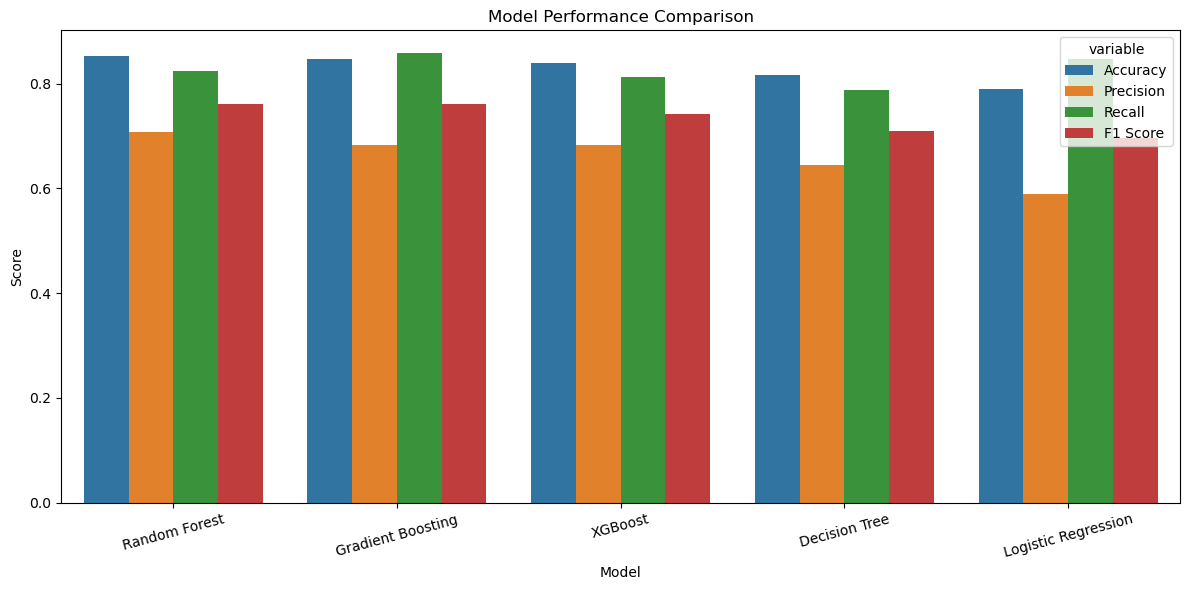


Feature Importance (Random Forest):
                Feature  Importance
4  RecruitmentStrategy    0.340244
2       InterviewScore    0.199450
3           SkillScore    0.194622
1      ExperienceYears    0.155764
0       EducationLevel    0.109920


C:\Users\varun\AppData\Local\Temp\ipykernel_2360\2294992492.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='viridis')


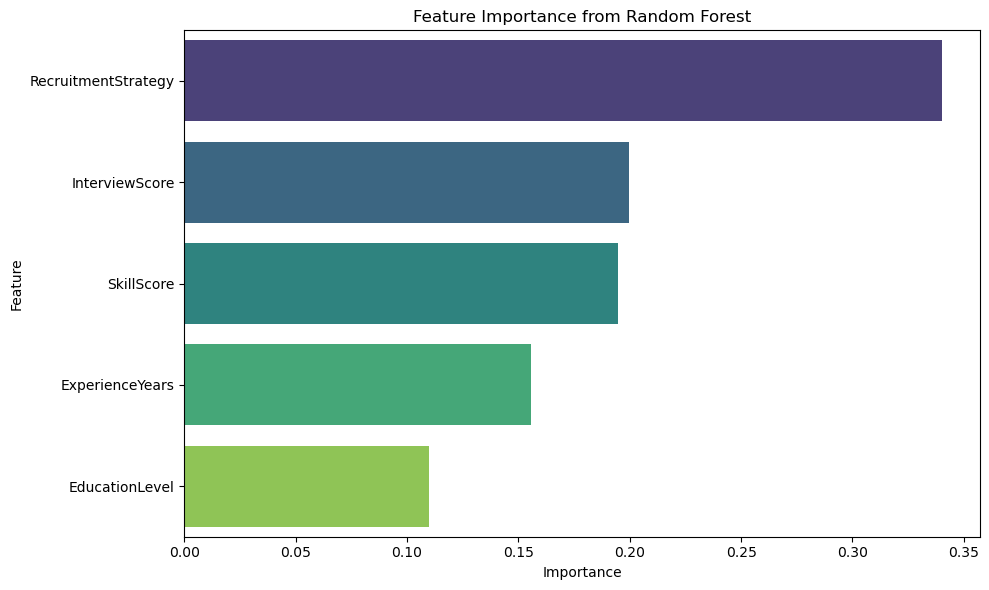

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("recruitment_data.csv")

# Select key features and target
X = df[['EducationLevel', 'ExperienceYears', 'InterviewScore', 'SkillScore', 'RecruitmentStrategy']]
y = df['HiringDecision']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate models
results = []
feature_importances = {}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("\nModel Performance Comparison:\n", results_df)

# Plot performance
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("model_performance_comparison.png")
plt.show()

# Feature Importance from Random Forest
rf_model = models["Random Forest"]
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest):\n", rf_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.savefig("feature_importance_rf.png")
plt.show()


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("recruitment_data.csv")

# Select features and target
X = df[['EducationLevel', 'ExperienceYears', 'InterviewScore', 'SkillScore', 'RecruitmentStrategy']]
y = df['HiringDecision']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate all models
results = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Show results
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("\n📊 Model Performance (No Graph, Table Only):\n")
print(results_df.round(3))



📊 Model Performance (No Graph, Table Only):

                 Model  Accuracy  Precision  Recall  F1 Score
2        Random Forest     0.863      0.724   0.835     0.776
3    Gradient Boosting     0.847      0.682   0.859     0.760
4              XGBoost     0.840      0.683   0.812     0.742
1        Decision Tree     0.813      0.644   0.765     0.699
0  Logistic Regression     0.790      0.590   0.847     0.696


C:\Users\varun\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:23:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


C:\Users\varun\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:27:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\varun\AppData\Local\Temp\ipykernel_2360\3287096490.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="crest")
C:\Users\varun\AppData\Local\Temp\ipykernel_2360\3287096490.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()



📊 Model Performance Metrics:

                 Model  Accuracy  Precision  Recall  F1 Score
2        Random Forest     0.860      0.717   0.835     0.772
3    Gradient Boosting     0.847      0.682   0.859     0.760
4              XGBoost     0.840      0.683   0.812     0.742
1        Decision Tree     0.813      0.636   0.800     0.708
0  Logistic Regression     0.790      0.590   0.847     0.696


C:\Users\varun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


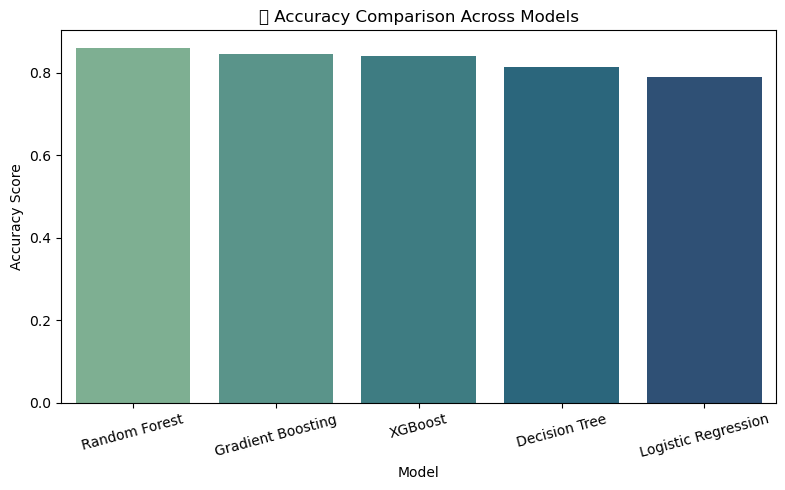

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("recruitment_data.csv")

# Select features and target
X = df[['EducationLevel', 'ExperienceYears', 'InterviewScore', 'SkillScore', 'RecruitmentStrategy']]
y = df['HiringDecision']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train, predict, evaluate
results = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

# Print all metrics
print("\n📊 Model Performance Metrics:\n")
print(results_df.round(3))

# Plot accuracy only
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="crest")
plt.title("🔍 Accuracy Comparison Across Models")
plt.xticks(rotation=15)
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()


In [21]:
# Data types
print("🧬 Data Types:")
print(df.dtypes)

# Null values
print("\n🚨 Null Values:")
print(df.isnull().sum())


🧬 Data Types:
Age                      int64
Gender                   int64
EducationLevel           int64
ExperienceYears          int64
PreviousCompanies        int64
DistanceFromCompany    float64
InterviewScore           int64
SkillScore               int64
PersonalityScore         int64
RecruitmentStrategy      int64
HiringDecision           int64
dtype: object

🚨 Null Values:
Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64


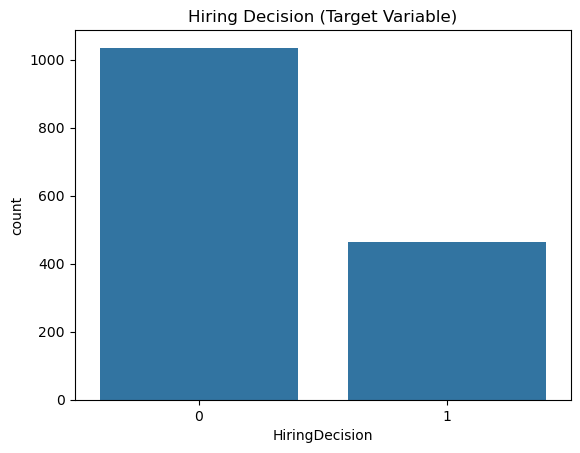

In [23]:
sns.countplot(x='HiringDecision', data=df)
plt.title("Hiring Decision (Target Variable)")
plt.show()


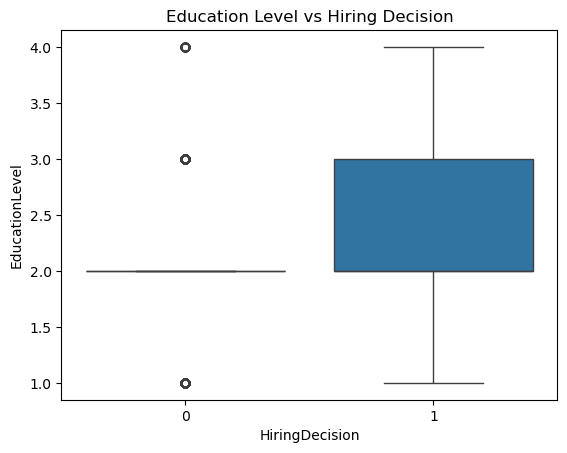

In [25]:
sns.boxplot(x='HiringDecision', y='EducationLevel', data=df)
plt.title("Education Level vs Hiring Decision")
plt.show()


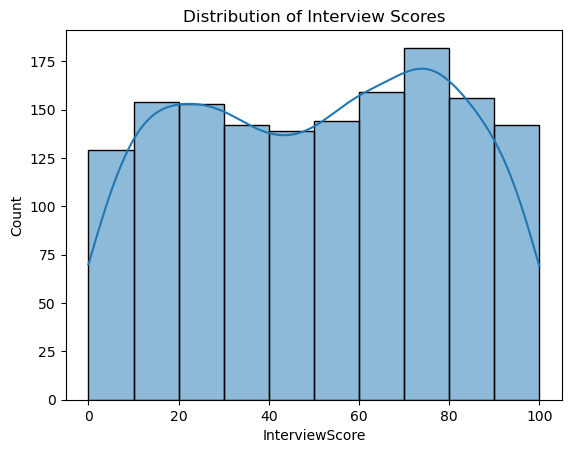

In [27]:
sns.histplot(df['InterviewScore'], bins=10, kde=True)
plt.title("Distribution of Interview Scores")
plt.show()


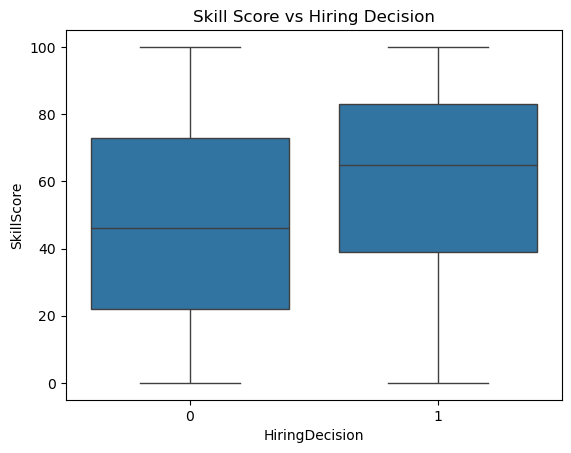

In [29]:
sns.boxplot(x='HiringDecision', y='SkillScore', data=df)
plt.title("Skill Score vs Hiring Decision")
plt.show()


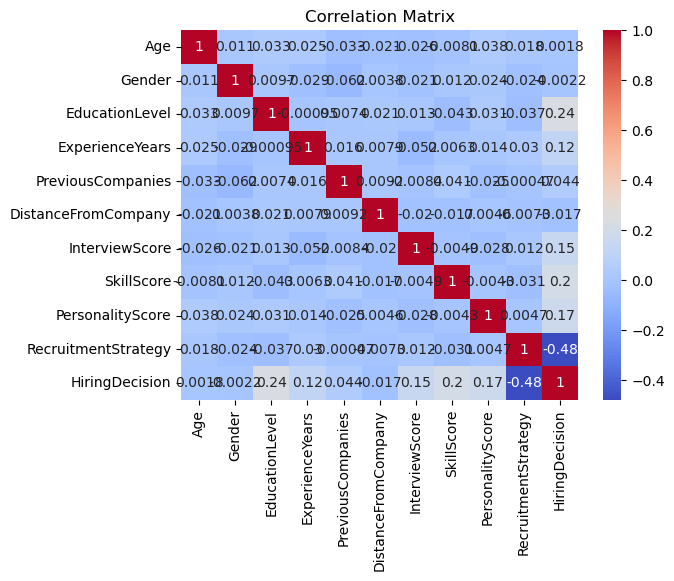

In [31]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [47]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and prepare data
df = pd.read_csv("recruitment_data.csv")
X = df[['ExperienceYears', 'InterviewScore', 'SkillScore']]
y = df['HiringDecision']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model with boosted class 1 weight
model = RandomForestClassifier(class_weight={0: 1, 1: 6}, random_state=42)
model.fit(X_train, y_train)

# Prediction function
def predict_hiring(exp, interview, skill):
    input_df = pd.DataFrame([[exp, interview, skill]], columns=['ExperienceYears', 'InterviewScore', 'SkillScore'])
    input_scaled = scaler.transform(input_df)
    
    prob = model.predict_proba(input_scaled)[0][1]  # Probability of being hired
    prediction = 1 if prob >= 0.2 else 0  # Apply custom threshold

    result_text = "✅ Hired" if prediction == 1 else "❌ Not Hired"
    return result_text, round(prob * 100, 1)

# Gradio UI
gr.Interface(
    fn=predict_hiring,
    inputs=[
        gr.Slider(0, 20, step=1, label="Years of Experience"),
        gr.Slider(0, 10, step=1, label="Interview Score"),
        gr.Slider(0, 10, step=1, label="Skill Score"),
    ],
    outputs=[
        gr.Text(label="Hiring Decision"),
        gr.Slider(minimum=0, maximum=100, step=0.1, label="Confidence Level (%)", interactive=False)
    ],
    title="🎯 Smart Recruitment Predictor with Confidence Meter",
    description="Predict hiring decision based on top features and visualize the confidence level."
).launch()


* Running on local URL:  http://127.0.0.1:7890

To create a public link, set `share=True` in `launch()`.
